## Импортируем библиотеки


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [69]:
import warnings
warnings.filterwarnings('ignore')

## Загружаем данные

In [70]:
df = pd.read_csv('/Users/evgenijmihajlov/Учебный материал/machine learning/Files/Country-data.csv')

In [71]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


* Country – название страны.

* Child_mort – коэффициент детской смертности.

* Exports – объем экспорта.

* Health – процент расходов на здравоохранение.

* Imports – объем импорта.

* Income – доход.

* Inflation – инфляция.

* Life_expect – ожидаемая продолжительность жизни.

* Total_fer – общий коэффициент рождаемости.

* GDPP – ВВП на душу населения.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [73]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [74]:
df[df['income'] > 75000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


In [75]:
from sklearn.preprocessing import StandardScaler
countries = df['country']
df_numeric = df.drop(columns=['country'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)
scaled_df['country'] = countries


In [76]:
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,Vanuatu
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,Venezuela
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,Vietnam
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,Yemen


In [77]:
df[['income', 'gdpp']] = np.log1p(df[['income', 'gdpp']])


In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

Text(0, 0.5, 'Inertia')

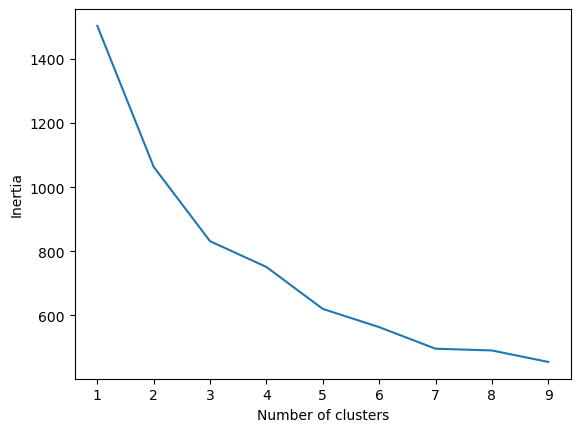

In [79]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [80]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

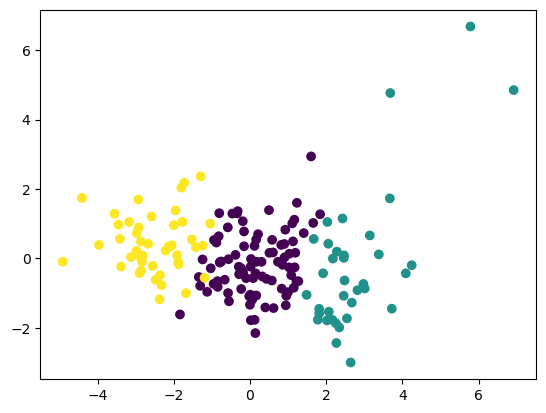

In [81]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')

In [82]:
df['cluster'] = clusters

In [83]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,7.384610,9.44,56.2,5.82,6.317165,2
1,Albania,16.6,28.0,6.55,48.6,9.203416,4.49,76.3,1.65,8.316545,0
2,Algeria,27.3,38.4,4.17,31.4,9.465060,16.10,76.5,2.89,8.403128,0
3,Angola,119.0,62.3,2.85,42.9,8.682877,22.40,60.1,6.16,8.169336,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,9.857496,1.44,76.8,2.13,9.409273,0


In [84]:
y = df['cluster'] 
X = df.drop(columns=['country', 'cluster'])  

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=48
)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9107142857142857
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.77      0.91      0.83        11
           2       1.00      0.94      0.97        18

    accuracy                           0.91        56
   macro avg       0.90      0.91      0.90        56
weighted avg       0.92      0.91      0.91        56



In [87]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      1.00      1.00        11
           2       1.00      0.89      0.94        18

    accuracy                           0.96        56
   macro avg       0.98      0.96      0.97        56
weighted avg       0.97      0.96      0.96        56



In [88]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8214285714285714
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.71      0.91      0.80        11
           2       0.93      0.78      0.85        18

    accuracy                           0.82        56
   macro avg       0.82      0.83      0.82        56
weighted avg       0.83      0.82      0.82        56

